In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
url = r"https://archive.ics.uci.edu/ml/" + r"machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names = ["sepal-length", "sepal-width","petal-length", "petal- width","Class"])

iris["Class"] = np.where(iris["Class"]=="Iris-setosa",1,0)
X = iris.drop("Class", axis=1)
y = iris["Class"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=10)

In [3]:
# Initialize the weights and bias randomly
def initialize_parameters(X):
    b = np.random.rand()
    w = np.random.rand(X.shape[1],1)
    return w, b

In [23]:
def model(X, y, lr, iterations, algo):
    
    cost = []
    counter = 0
    n = len(X)
    w, b = initialize_parameters(X)
    
    while iterations > counter:
        
        if algo == "Batch":
        
            z = np.dot(w.T,X.T) + b
            pred = 1 / (1 + np.exp(-z))

            #Calculate Loss Function
            MSE = np.square(np.subtract(y, pred)).mean()

            #find gradient (back propagation)
            dw = 1/n * np.dot(X.T, (pred - y).T)
            db = 1/n* np.sum(pred - y)

            w = w - lr * dw
            b = b - lr * db
            
            if counter % 100 == 0:
                cost.append(MSE)
                
        elif algo == "SGD":
            
            for j in range(n):
            
                X1 = X[j,:]
                y1 = y[j]

                z = np.dot(w.T, X1.T) + b
                pred = 1 / (1 + np.exp(-z))

                #Calculate Loss Function
                MSE = np.square(np.subtract(y1, pred)).mean()

                #find gradient (back propagation)
                dw = np.multiply(X1, (pred - y1)).reshape((4,1))
                db = pred - y1

                w = w - lr * dw
                b = b - lr * db
        
            #Calculate Loss Function for all points     
            z_all = np.dot(w.T,X.T) + b
            pred_all = 1 / (1 + np.exp(-z_all))

            MSE = np.square(np.subtract(y, pred_all)).mean()

            if counter % 10 == 0:
                cost.append(MSE)
                
        counter+= 1
            
    return w, b, cost

In [24]:
def plot(cost, algo, dataset):
    plt.figure(figsize = (15,7))
    sns.lineplot(x = list(range(0,len(cost))), y = cost)
    plt.title("MSE - "+ dataset + " ("+algo+")")
    plt.xlabel("# of iterations")
    plt.ylabel("MSE")
    plt.show()

In [25]:
# Function Calls

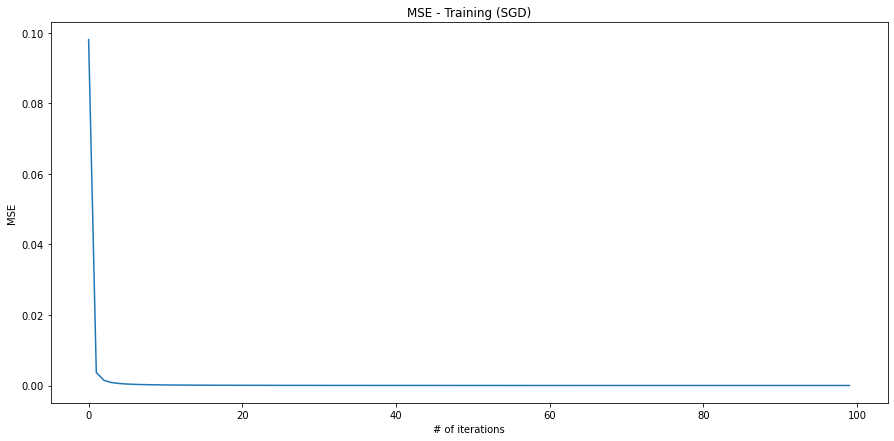

In [26]:
cost_train_sgd = []
w, b, cost_train_sgd = model(X_train, y_train, lr = 0.01, iterations = 1000, algo = "SGD")
plot(cost_train_sgd, algo = "SGD", dataset = "Training")

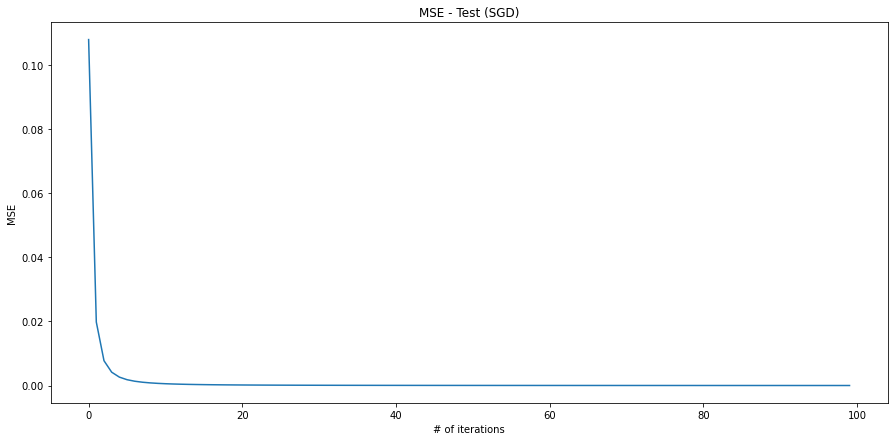

In [27]:
cost_test_sgd = []
w, b, cost_test_sgd  = model(X_test, y_test, lr = 0.01, iterations = 1000, algo = "SGD")
plot(cost_test_sgd, algo = "SGD", dataset = "Test")

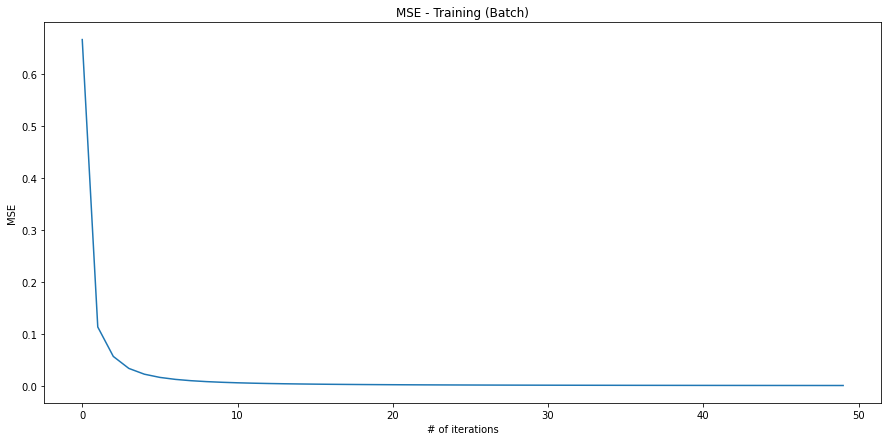

In [28]:
cost_train_b = []
w, b, cost_train_b = model(X_train, y_train, lr = 0.01, iterations = 5000, algo = "Batch")
plot(cost_train_b, algo = "Batch", dataset = "Training")

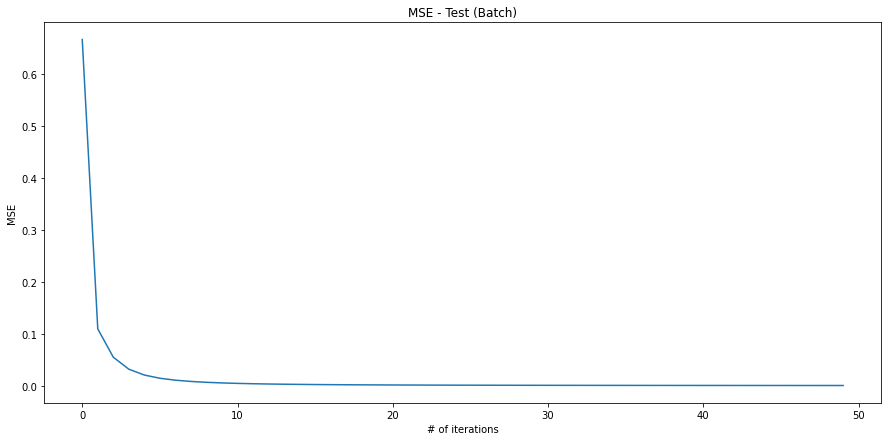

In [29]:
cost_test_b = []
w, b, cost_test_b = model(X_test, y_test, lr = 0.01, iterations = 5000, algo = "Batch")
plot(cost_test_b, algo = "Batch", dataset = "Test")

In [13]:
from random import sample

In [14]:
def create_batch(X, y, batch_size):
    
    index = []
    for i in range(len(X)):
        index.append(i)
    
    X_mini_batches = []
    y_mini_batches = []

    batch_group = int(len(X) / batch_size)

    for i in range(batch_group):
        
        mb = sample(index, batch_size)
        X_new = X[mb, : ]
        y_new = y[mb]
        
        X_mini_batches.append(X_new)
        y_mini_batches.append(y_new)

    return X_mini_batches, y_mini_batches

In [20]:
def mini_batch(X, y, lr, iterations):
    
    w = np.random.random(4)
    b = np.random.random()

    cost = []
    counter = 0

    while iterations > counter:
            
        X_batch, y_batch = create_batch(X_train, y_train, 12)

        for j in range(0, 10):
            z = np.dot(X_batch[j], w.T) + b

            dw = (1/10) * np.dot(X_batch[j].T , (z - list(y_batch[j])).T)
            db = (1/10) * np.sum(z - list(y_batch[j]))

            w = w - lr * dw.T
            b = b - lr * db

            MSE = (1/10) * np.power(np.sum( z - y_batch[j]),2)
            
        if counter % 10 == 0:
                cost.append(MSE)
        counter+= 1
    
    return cost

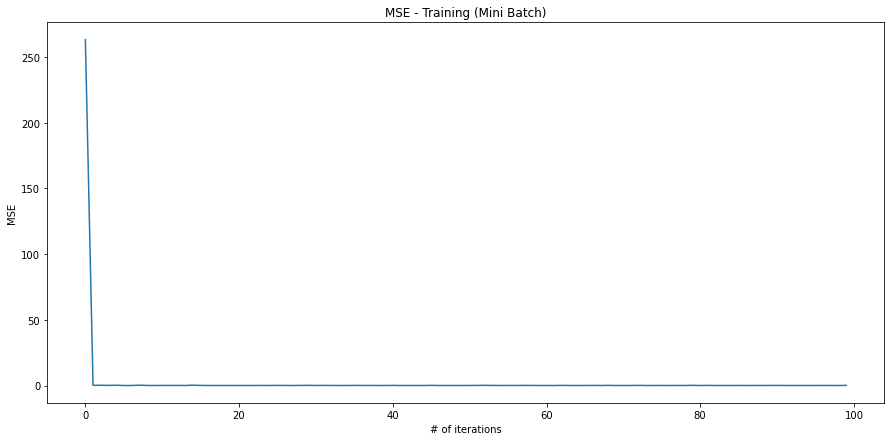

In [21]:
cost_train_mb = mini_batch(X_train, y_train, lr = 0.001, iterations = 1000)
plot(cost_train_mb, algo = "Mini Batch", dataset = "Training")

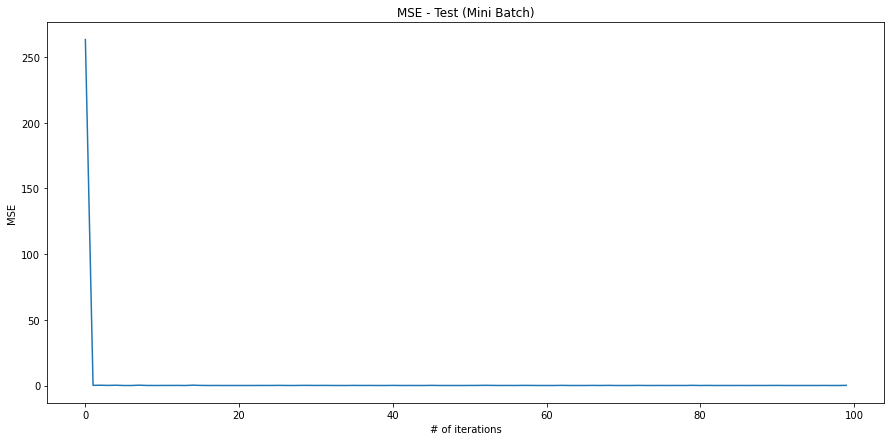

In [22]:
cost_test_mb = mini_batch(X_test, y_test, lr = 0.001, iterations = 100)
plot(cost_train_mb, algo = "Mini Batch", dataset = "Test")